# 传统计算机视觉特征表达与处理

在本次的练习中，你将通过实际的一些操作，对计算机图像的存储和传统计算机视觉特征提取方法有一定的理解。

如果发现任何与本教程内容有关的错误或改进，请联系作者：acdoge.cao@gmail.com

参考资料：

- Jan Erik Solem 著. 朱文涛 / 袁勇 译. 《Python 计算机视觉编程》. 人民邮电出版社. 2014
- Richard Szeliski 著. 艾海舟 / 兴军亮 译. 《计算机视觉：算法与应用》. 清华大学出版社. 2012
- Rafael C. Gonzalez 著. 阮秋琦 译. 《数字图像处理（第三版）》. 电子工业出版社. 2011
- Robot Vision 著. 蒋欣兰 译. 《机器视觉》. 中国青年出版社. 2014

后面两本书相对前两本比较难，但更为全面和深入，有能力的情况下建议阅读英文原版。

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## PIL 与 Numpy 格式图片基本操作

PIL (Python Image Library) [[GitHub](https://github.com/python-pillow/Pillow)] [[Docs](https://pillow.readthedocs.io/en/latest/)] 是 Python 平台的图像处理标准库，兼具强大的功能和简洁的 API. 而 Pillow 是 PIL 的一个友好 Fork，提供了了广泛的文件格式支持，强大的图像处理能力，主要包括图像储存、图像显示、格式转换以及基本的图像处理等操作。如果安装了 Anaconda, 则 Pillow 就已经可用了。

我们以最经典的 Lenna 图为例(关于这张图片的故事可以访问[这个网页](http://www.lenna.org/))

![](./assets/lenna.jpg)

计算机中显示的图形一般可以分为两大类——位图(标量图)和矢量图，位图亦称为点阵图像或绘制图像，是由称作像素（图片元素）的单个点组成的。这些点可以进行不同的排列和染色以构成图样。当放大位图时，可以看见赖以构成整个图像的无数单个方块。扩大位图尺寸的效果是增大单个像素，从而使线条和形状显得参差不齐。然而，如果从稍远的位置观看它，位图图像的颜色和形状又显得是连续的。矢量图使用直线和曲线来描述图形，这些图形的元素是一些点、线、矩形、多边形、圆和弧线等等，它们都是通过数学公式计算获得的。在本节教程中，处理的都是位图。

**图片的读取**：现在我们尝试读取一张示范图片：

In [2]:
IMG_URL = "./assets/lenna.jpg"   # 这个图片需要单独下载，或者你自己选用图片
img = Image.open(IMG_URL, 'r')
img.show()
# 此时应该弹窗显示图像

在 Notebook 中使用 PIL, 如果想要以内联的形式显示图像，则需要结合 `matplotlib inline` : 

'RGB'

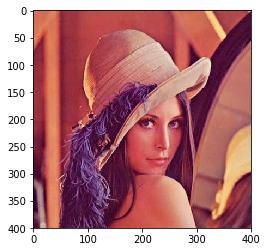

In [3]:
%matplotlib inline  
# 百分号开头的都是 Magic Function, 可以自行了解

plt.imshow(img)     # 内联显示，不会弹窗，适合交互式环境
img.mode            # 显示图像的颜色格式 -- RGB

**PIL 转 Numpy.** 我们可以将 PIL Image 图片转换为 Numpy 数组，方便后续的分析：

In [4]:
np.array(img)[:,:,0] # 先不在意输出的具体值
# 使用 np.asarray() 可以达到同样的效果
# 区别是 np.array() 是深拷贝，np.asarray() 是浅拷贝

array([[211, 209, 208, ..., 232, 222, 191],
       [211, 209, 208, ..., 226, 219, 191],
       [211, 209, 210, ..., 228, 217, 189],
       ...,
       [ 67,  69,  71, ..., 148, 150, 147],
       [ 66,  68,  70, ..., 152, 157, 161],
       [ 65,  68,  70, ..., 153, 164, 172]], dtype=uint8)

**图像格式转换**：图像的颜色转换可以使用 `convert()` 方法来实现。要读取一幅图像，并将其转换成
灰度图像，只需要加上 `convert('L')`, 如下所示：

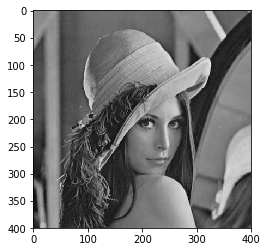

In [5]:
img_l = img.convert('L')

# 你也可以自己写一个函数来灰度化图片：
# def rgb2gray(rgb):
#     return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# plt.imshow(img_l, cmap ='gray')    # 指定以灰度级显示单通道图片
plt.gray()                           # 有些人可能修改了默认显示方式，所以这里还原一下
plt.imshow(img_l)

对于一张 RGB 图片，PIL 采用的灰度计算公式是：

$$
L = R \times 299/1000 + G \times 587/1000 + B \times 114/1000
$$

关于 `convert()` 的更多参数和使用方法，请查看[文档](https://pillow.readthedocs.io/en/latest/_modules/PIL/Image.html#Image.convert)。

**保存 PIL 图片**：直接调用 `Image` 类的 `save` 方法。

In [6]:
img.save('./assets/new_lenna.jpg')
# 在 assets 文件夹下应当出现新的名为 new_lenna.jpg 的图片

通过 `save()` 方法， PIL 可以将图像保存成多种格式的文件。PIL 的 `open()` 函数用于创建 PIL 图像对象， `save()` 方法用于保存图像到具有指定文件名的文件。除了后缀变为“.jpg”，上述代码的新文件名和原文件名相同。 PIL 是个足够智能的类库，可以根据文件扩展名来判定图像的格式。 PIL 函数会进行简单的检查，如果文件不是 JPEG 格式，会自动将其转换成 JPEG 格式；如果转换失败，它会在控制台输出一条报告失败的消息。

## 图片基础变换

PIL 图像可以进行多种基础操作，包括缩放大小、旋转角度等等，更多变换方式可以查阅[文档](https://pillow.readthedocs.io/en/latest/reference/Image.html)。

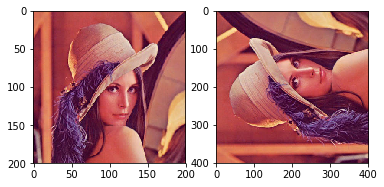

In [7]:
plt.subplot(1,2,1)
plt.imshow(img.resize((200, 200)))  # 缩放图像大小

plt.subplot(1,2,2)
plt.imshow(img.rotate(90))          # 旋转图像角度

## 图像像素的矩阵表达

我们得到所使用 Lenna 图的分辨率，即长和宽的参数，并转换成对应的 Numpy 数组，我们很容易发现 `size` 是原来长宽像素数量乘积的三倍。这是因为这里不仅考虑了长和宽，还考虑了 RGB 三个颜色通道。通道(channel) 的概念在计算机视觉中经常遇到，我们在后续的课程中还会遇到它。

In [8]:
print(img.size)               # 图像的长和宽像素个数，即分辨率
img_np = np.asarray(img)      # 转化为 Numpy 数组
print(img_np.size)            # 两个 size 的含义不同
print(img_np.shape)           # 可以发现是 3 通道

(400, 400)
480000
(400, 400, 3)


我们在之前的练习中学习了切片语法以及 `axis` 原理，现在可以人为地将三个通道分别表示出来。

Text(0.5, 0, 'blue channel')

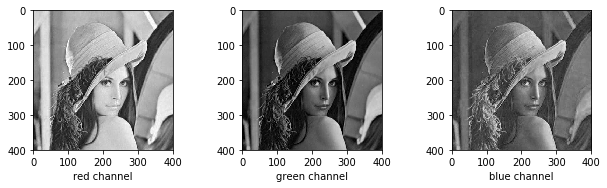

In [9]:
plt.figure(figsize=(10,10))                  # 调整子图大小
plt.subplots_adjust(wspace =0.5, hspace =0)  # 调整子图间距

plt.subplot(1,3,1)
plt.imshow(img_np[:, :, 0])  # 红色 Red
plt.xlabel('red channel')

plt.subplot(1,3,2)
plt.imshow(img_np[:, :, 1])  # 绿色 Green
plt.xlabel('green channel')

plt.subplot(1,3,3)
plt.imshow(img_np[:, :, 2])  # 蓝色 Blue
plt.xlabel('blue channel')

### 灰度直方图

通过成员函数的连续调用，在打开图像时就可以将其同时转换为灰度图。

PIL size: (400, 400)
Numpy size: 160000
Numpy shape: (400, 400)
Value range from 9 to 245


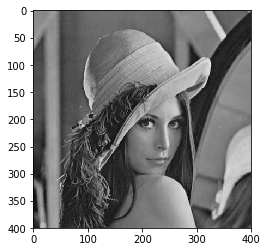

In [10]:
img_l = Image.open(IMG_URL).convert('L')               
plt.imshow(img_l)
print('PIL size: ' + str(img_l.size))

img_l_np = np.asarray(img_l)                           # 转换成 Numpy 数组
print('Numpy size: ' + str(img_l_np.size))             # 此时变成了单通道图片
print('Numpy shape: ' + str(img_l_np.shape))           # 下面这一行显示了颜色范围
print('Value range from ' + str(img_l_np.min()) + ' to ' + str(img_l_np.max()))

In [11]:
img_l_np # 查看对应的像素矩阵

array([[145, 143, 140, ..., 157, 144, 112],
       [145, 143, 140, ..., 153, 144, 116],
       [143, 141, 141, ..., 159, 149, 121],
       ...,
       [ 31,  33,  35, ...,  81,  78,  74],
       [ 30,  32,  34, ...,  82,  82,  83],
       [ 29,  32,  34, ...,  80,  86,  93]], dtype=uint8)

我们希望能用一种更加直观的形式，对灰度图中的颜色特征进行表示，比如灰度直方图。  
在此之前，我们先来看看一张直方图是如何使用 `hist()` 函数绘制的。

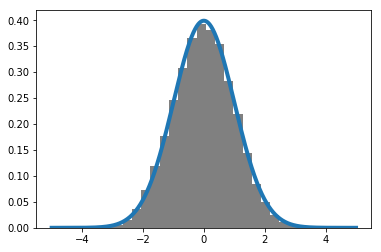

In [12]:
X = np.random.randn(10000)                         # 使用 random 类生成数目为 10000 的伪随机数
fig, ax = plt.subplots()                           # 创建一个绘制对象
ax.hist(X, bins=25, density=True, color = 'gray')  # 绘制灰度直方图
                                                   # 第一个参数是随机数序列，bins 指定直方的个数 
                                                   # density 指定是否进行归一化，color指定直方图的颜色
x = np.linspace(-5, 5, 1000)
ax.plot(x, 1 / np.sqrt(2*np.pi) *                  # 随机数据服从正态分布
        np.exp(-(x**2)/2), linewidth=4)            # 因此画出正态分布曲线进行比对
plt.show()

有了上面的经验，我们很自然地可以将作出一张图片的灰度直方图：

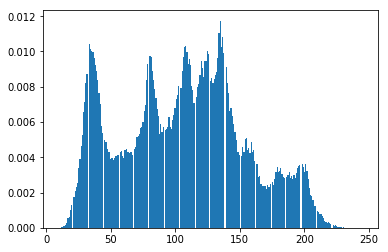

In [13]:
fig, ax = plt.subplots() 
pix = img_l_np.ravel()
ax.hist(pix, density=True, bins=256)   # ravel / flatten 将图像像素拉成一维数组
plt.show()                             # 横坐标是像素级范围 [0, 255]

注意我们为了使用直方图进行表示，对二维图片中的像素进行了 `flatten()` 展平，拉升成了一维序列(或者说向量), 不难发现这一步中丢失了图像像素之间的空间信息。进行到这一步，你对直方图的使用情景有没有什么理解呢？关于将二维图片展平的操作，我们以后还会遇到。

### 颜色直方图

使用和灰度直方图同样的思路，我们可以得到一张图片的颜色直方图：

Text(0.5, 0, 'blue channel')

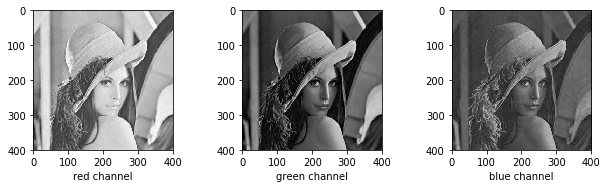

In [14]:
img = Image.open(IMG_URL)

# img_r = np.array(img)[:, :, 0]
# img_g = np.array(img)[:, :, 1]
# img_b = np.array(img)[:, :, 2]
# 实际上有着更加简单的语法，我们这次使用 split() 函数

img_r, img_g, img_b = img.convert('RGB').split()

plt.figure(figsize=(10,10))                    # 调整子图大小
plt.subplots_adjust(wspace =0.5, hspace =0.5)  # 调整子图间距

plt.subplot(1,3,1)
plt.imshow(img_r)  # 红色 Red
plt.xlabel('red channel')

plt.subplot(1,3,2)
plt.imshow(img_g)  # 绿色 Green
plt.xlabel('green channel')

plt.subplot(1,3,3)
plt.imshow(img_b)  # 蓝色 Blue
plt.xlabel('blue channel')

Text(0.5, 0, 'blue channel')

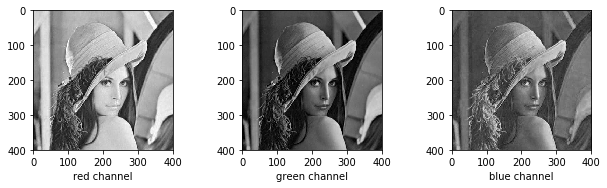

In [15]:
# 我们再来看看之前人为分离出的三个颜色通道

plt.figure(figsize=(10,10))                    # 调整子图大小
plt.subplots_adjust(wspace =0.5, hspace =0.5)  # 调整子图间距

plt.subplot(1,3,1)
plt.imshow(img_np[:, :, 0])  # 红色 Red
plt.xlabel('red channel')

plt.subplot(1,3,2)
plt.imshow(img_np[:, :, 1])  # 绿色 Green
plt.xlabel('green channel')

plt.subplot(1,3,3)
plt.imshow(img_np[:, :, 2])  # 蓝色 Blue
plt.xlabel('blue channel')

这里出现一个有意思的情况，为什么调用函数和手动分离得到的 RGB 单通道图显示的不一样呢？  

这是因为对于单通道图，默认以灰度的形式进行显示，具体原理可以查看 `imshow()` 函数的[文档](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)。

而使用指定公式分离出的三通道图，并不是通过简单的 Numpy 数组求和就能够进行还原，如下第二张图。

如果对单通道 Numpy 数组使用 `imshow()` 函数，效果则会发生变化：

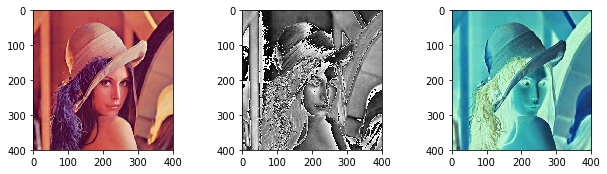

In [16]:
plt.figure(figsize=(10,10))                    # 调整子图大小
plt.subplots_adjust(wspace =0.5, hspace =0.5)  # 调整子图间距

plt.subplot(1,3,1)
plt.imshow(img_np)

plt.subplot(1,3,2) 
plt.imshow(img_np[:, :,0] + img_np[:, :,1] + img_np[:, :,2])

plt.subplot(1,3,3) 
plt.imshow(np.ones_like(img_np) * 255 - img_np)  # 反相

In [17]:
np.array(img_r) == np.array(img_np[:, :,0])   # 检验转化为 numpy 数组后是否有变化

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

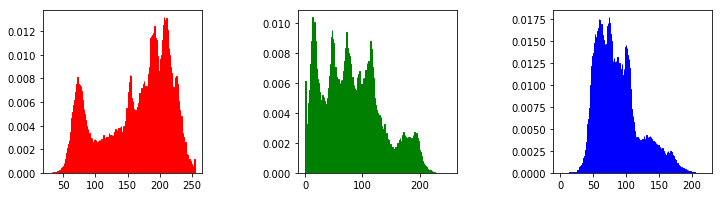

In [18]:
plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace =0.6, hspace =0)

ar = np.array(img_r).flatten() 
ag = np.array(img_g).flatten()
ab = np.array(img_b).flatten()

plt.subplot(1,3,1)
plt.hist(ar, bins = 256, density = True, facecolor = 'red', edgecolor = 'red')

plt.subplot(1,3,2)
plt.hist(ag, bins = 256, density = True, facecolor = 'green', edgecolor = 'green')

plt.subplot(1,3,3)
plt.hist(ab, bins = 256, density = True, facecolor = 'blue', edgecolor = 'blue')

plt.show()

不难发现，颜色直方图所描述的是不同色彩在整幅图像中所占的比例，而并不关心每种色彩所处的空间位置，即无法描述图像中的对象或物体。因此颜色直方图特别适于描述那些难以进行自动分割的图像。你在 Photoshop 这样的软件中经常看到颜色直方图叠加在一起显示：

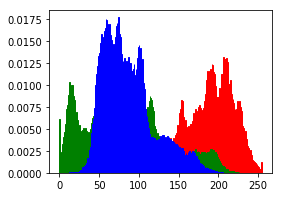

In [19]:
plt.figure(figsize=(4,3))
plt.hist(ar, bins = 256, density = True, facecolor = 'red', edgecolor = 'red')
plt.hist(ag, bins = 256, density = True, facecolor = 'green', edgecolor = 'green')
plt.hist(ab, bins = 256, density = True, facecolor = 'blue', edgecolor = 'blue')
plt.show()



# OpenCV / Scikit-image 处理图片

除了 `PIL` 以外，你也会经常见到使用 `skimage` 和 `opencv` 对图像进行处理的例子。它们都支持对图片进行处理，却有着不同的实现细节，其实你只要知道了背后的实现原理(就像我们尝试用 Numpy 进行源码级实现一样), 在学习不同的库或框架时，也能够快速上手。但是细节上的差异也要注意，比如：

`plt.imread` 和 `PIL.Image.open` 读入为 RGB 格式，`cv2.imread` 读入为 BGR, 有时候需要进行转换。OpenCV 原本是 C++ 库，现在提供了 Python 接口，只不过还有大量的算法没有提供对应的 Python 接口，文档也没有 C++ 版本详细，不过依旧有学习 OpenCV 的必要性。

如果你的环境中没有安装 `opencv-python` , 则可以在命令行中使用 `pip` 安装(注意更换下载源), notebook 也支持直接运行类似的命令：

```
!pip install opencv-python           # 在 notebook 内执行命令行(不推荐)
```

In [20]:
import cv2           # 没有报错则表示 opencv-python 安装成功
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

PIL 库有自己的图像对象，而在 Scikit-image 和 OpenCV for Python 中，图像就是 NumPy 中的数组！

现在我们来感受一下换用 OpenCV 后的写法有何不同(Scikit-image 不再单独举例)：

480000
(400, 400, 3)


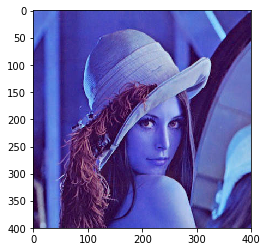

In [21]:
IMG_URL = './assets/lenna.jpg'

img = cv2.imread(IMG_URL)
print(img.size)
print(img.shape)
plt.imshow(img)

图像的颜色似乎有些怪异... 为什么呢？

前面提到了，OpenCV 的读图顺序是 BGR 顺序，需要转化为常见的 RGB 顺序：

480000
(400, 400, 3)


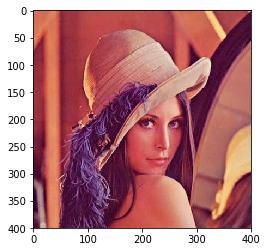

In [22]:
img_rgb = img[:,:,::-1]      # 如果你理解切片操作，应该能理解这行代码
print(img_rgb.size)
print(img_rgb.shape)
plt.imshow(img_rgb)

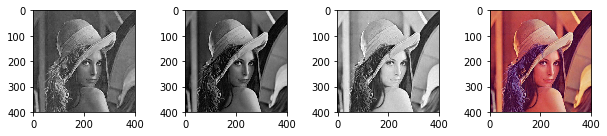

In [23]:
# 三通道顺序是 Blue Green Red
# img_b = cv2.imread(IMG_URL, 0)
# img_g = cv2.imread(IMG_URL, 1)
# img_r = cv2.imread(IMG_URL, 2)

img_b, img_g, img_r = cv2.split(img)

plt.figure(figsize=(10,10))                  # 调整子图大小
plt.subplots_adjust(wspace =0.5, hspace =0)  # 调整子图间距

plt.subplot(1,4,1)
plt.imshow(img_b)  

plt.subplot(1,4,2)
plt.imshow(img_g) 

plt.subplot(1,4,3)
plt.imshow(img_r) 

plt.subplot(1,4,4)
plt.imshow(cv2.merge([img_r, img_g, img_b]))  # 使用 merge() 还原

 除了前面的两种原始方法，也可以使用 OpenCV 提供的颜色格式转换函数：

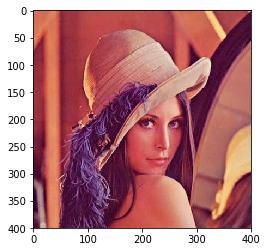

In [24]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

你可以查阅 opencv-python 的[文档](https://docs.opencv.org/4.1.0/)，把在 PIL 中实现的操作全部实现一遍。

由于 OpenCV 发展历史悠久，因此很多经典的处理方法都进行了封装，比如计算颜色直方图的 `calcHist()` 函数：

In [25]:
# 
def calcAndDrawHist(image, color):  
    hist= cv2.calcHist([image],       # 图片对象
                       [0],           # 使用的通道，这里使用灰度图计算直方图
                       None,          # 没有使用mask
                       [256],         # 表示这个直方图分成多少个 bins
                       [0.0,255.0])   # 直方图柱总共表示的范围
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(hist)   # maxVal 用于归一化
    histImg = np.zeros([256,256,3], np.uint8)              # 绘制空的背景
    hpt = int(0.9 * 256);                                  # 下面的代码尝试自己理解/查文档
      
    for h in range(256):  
        intensity = int(hist[h] * hpt/maxVal)  
        cv2.line(histImg,(h,256), (h,256-intensity), color)  
          
    return histImg;

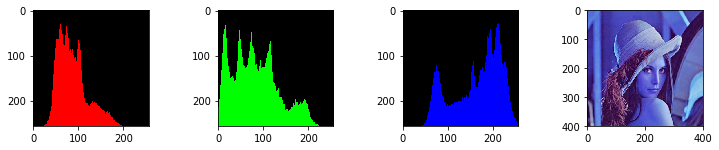

In [26]:
img = cv2.imread(IMG_URL)  
b, g, r = cv2.split(img)  

histImgB = calcAndDrawHist(b, [255, 0, 0])  # 这里使用了驼峰命名法
histImgG = calcAndDrawHist(g, [0, 255, 0])  
histImgR = calcAndDrawHist(r, [0, 0, 255])  

# 会弹出四个窗，按任意键消失
cv2.imshow("histImgB", histImgB)  
cv2.imshow("histImgG", histImgG)  
cv2.imshow("histImgR", histImgR)  
cv2.imshow("Img", img)  
cv2.waitKey(0) 
cv2.destroyAllWindows()

# 同样地可以使用 matplotlib 来内联在 notebook 中显示

plt.figure(figsize=(12,3))
plt.subplots_adjust(wspace =0.6, hspace =0)

plt.subplot(1,4,1)
plt.imshow(histImgB)

plt.subplot(1,4,2)
plt.imshow(histImgG)  

plt.subplot(1,4,3)
plt.imshow(histImgR) 

plt.subplot(1,4,4)
plt.imshow(img) 

参考 [abid rahman](https://plus.google.com/118298613334549762938) 的做法，无需分离通道，用折线来描绘直方图的边界可在一副图中同时绘制三个通道的直方图。方法如下：

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


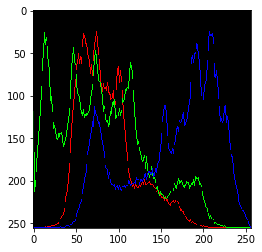

In [27]:
h = np.zeros((256,256,3))                      # 创建用于绘制直方图的全 0 图像  
bins = np.arange(256).reshape(256,1)           # 直方图中各 bin 的顶点位置  
color = [ (255,0,0),(0,255,0),(0,0,255) ]      # BGR三种颜色  

for ch, col in enumerate(color):  
    originHist = cv2.calcHist([img],[ch],None,[256],[0.0,255.0])         # 计算对应通道的直方图
    cv2.normalize(originHist, originHist, 0, 255*0.9, cv2.NORM_MINMAX)   # 该函数将直方图的范围限定
    hist= np.int32(np.around(originHist))                                # 四舍五入取整
    pts = np.column_stack((bins,hist))                                   # 叠加显示不同的子图
    cv2.polylines(h,[pts],False,col)                                     # 用线条的形式显示
       
h = np.flipud(h)                                                         # 将矩阵里面的值倒序
       
plt.imshow(h)  

对于直方图的叠加显示，其实有着更加优雅的方法，你可以尝试属于自己的实现方式。

(可选练习)不妨在下面设计一个显示图像颜色直方图的函数：

In [28]:
def my_hist():
    
    
    return

# 其它图像特征

**颜色矩。**图像中任何颜色分布均可以用它的矩来表示，矩也是图像处理中的常用概念。

我们来看看如何实际计算某颜色通道的几种矩：

$$
E=\frac{1}{N} \sum p i x
$$

$$
\sigma=\sqrt{\frac{1}{N} \sum(p i x-E)^{2}}
$$

$$
S=\sqrt[3]{\frac{1}{N} \sum(p i x-E)^{3}}
$$

In [29]:
print(r.shape)   # 在上一步中提取出的红色通道

# 一阶矩
ro_1a = r.mean()
print(ro_1a)

def mean(x=None):
    return np.sum(x) / np.size(x)

ro_1b = mean(r)
print(ro_1b)

# 二阶矩
ro_2a = r.std()
print(ro_2a)

def std(x=None):
    return np.sqrt(np.mean((x - x.mean()) ** 2))

ro_2b = std(r)
print(ro_2b)

# 三阶矩
def var(x=None):
    mid = np.mean(((x - x.mean()) ** 3))
    return np.sign(mid) * abs(mid) ** (1/3)

ro_3 = var(r)
print(ro_3)

(400, 400)
162.672925
162.672925
53.21290571322313
53.21290571322313
-43.76173295608608


有兴趣的同学可以尝试实现计算**颜色聚合向量**和**颜色相关图**(幻灯片中出现).

**灰度共生矩阵。**灰度共生矩阵(Gray Level Co-occurrence Matrix，GLCM) 统计了灰度图中像素间的灰度值分布规律以区分不同的纹理。

从灰度为 $i$ 的像素点出发，距离为 $(dx,dy)$ 的另一个像素点的灰度为 $j$ 的概率;


$$
P(i, j | d, \theta)=\#\{(x, y) | f(x, y)=i, f(x+d x, y+d y)=j ; x, y=0,1,2, \cdots, N-1\}
$$

式中， $d$ 是用像素数量表示的相对距离；  
$\theta$ 一般考虑四个方向，分别为 0°， 45° ， 90° ， 135° ；
$\#$ 表示集合； $i$, $j$ = 0,1,2, ⋯ , $L$ − 1；
$(x,y)$ 为图像中的像素坐标，$L$ 为图像灰度级的数目。


# 简单的卷积(滤波) 运算

我们最后这一部分，需要使用 OpenCV 实现一个小小的卷积运算，请先阅读阮一峰所译《[图像与滤波](https://www.ruanyifeng.com/blog/2017/12/image-and-wave-filters.html)》一文，完整内容查看[英文原文](https://medium.com/statuscode/filtering-images-using-web-audio-api-276555cca6ad)。

接着阅读 zouxy09 博文《[图像卷积与滤波的一些知识点](https://blog.csdn.net/zouxy09/article/details/49080029)》，这是一位优秀的博主，建议关注。

下面实现了一个简单的 3x3 卷积核，你可以试着看一下效果，尝试对其进行改进。

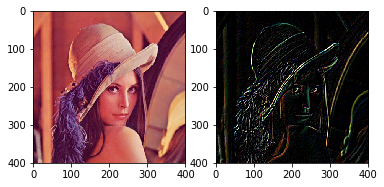

In [30]:
img = plt.imread(IMG_URL)   # 最后我要告诉你，matplotlib 本身就能读入图片，哈哈！

plt.subplot(1,2,1)
plt.imshow(img)

fil = np.array([[ -1,-1, 0],                        #这个是设置的滤波，也就是卷积核
                [ -1, 0, 1],
                [  0, 1, 1]])

res = cv2.filter2D(img,-1,fil)                      #使用opencv的卷积函数

plt.subplot(1,2,2)
plt.imshow(res)                                     #显示卷积后的图片

# 图像处理进阶

对上面内容的了解已经足够大家进行后续课程的学习，不过下面的文档可以帮助你加深内功：

- [OpenCV-Python Tutorials](https://docs.opencv.org/3.0-beta/doc/py_tutorials/)
 - [Image Processing in OpenCV](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html)
 - [Feature Detection and Description](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html)
 
更加推荐使用 C++ 进行 OpenCV 算法的调试与学习，在 MATLAB 中也有许多经典的图像处理工具箱。

讲座中提到的图像特征提取，可以参考以下三篇博文：

- [目标检测的图像特征提取之（一）HOG特征](http://blog.csdn.net/zouxy09/article/details/7929348)
- [目标检测的图像特征提取之（二）LBP特征](http://blog.csdn.net/zouxy09/article/details/7929531)
- [目标检测的图像特征提取之（三）Haar特征](http://blog.csdn.net/zouxy09/article/details/7929570)